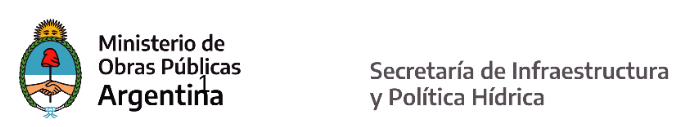

# **Introducción al procesamiento de datos de radar**

### Python:
Python es un lenguaje de programación ampliamente utilizado en las aplicaciones web, el desarrollo de software, la ciencia de datos y el machine learning (ML). Los desarrolladores utilizan Python porque es eficiente y fácil de aprender, además de que se puede ejecutar en muchas plataformas diferentes. El software Python se puede descargar gratis, se integra bien a todos los tipos de sistemas y aumenta la velocidad del desarrollo.

### Google Colab (Colaboratory):
Colaboratory, o "Colab" para abreviar, es un producto de Google Research. Permite a cualquier usuario escribir y ejecutar código arbitrario de Python en el navegador. Es especialmente adecuado para tareas de aprendizaje automático, análisis de datos y educación.

### Py-ART:
Py-ART es un módulo que consiste en un conjunto de herramientas y algoritmos, de acceso libre, para trabajar con datos de radares meteorológicos. Las mismas están basadas en el lenguaje de programación Python y son muy utilizadas por la comunidad de usuarios.


### Links útiles:
*   Qué es Python?: https://aws.amazon.com/es/what-is/python/
*   Google Colab: https://colab.research.google.com/?hl=es
*   Documentación Py-ART: https://py-art.readthedocs.io/en/latest/
*   Github: https://arm-doe.github.io/pyart/



*Contacto: matias.suarez@unc.edu.ar*


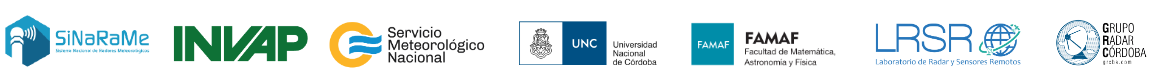

## **Primeramente se deben instalar las librerías específicas**

In [ ]:
# Instalamos arm_pyart y cartopy

## **Importamos las librerías**

<font color='green'>**Los comentarios (lineas que no son leidas en la ejecución) se indican con un # al principio**</font>

In [ ]:
# Importamos librerias necesarias para trabajar
# Libreria para trabajar con datos de radar PyART

# Expansión del patrón de nombres de ruta de estilo Unix (glob)

# Libreria para graficar matplotlib

# Libreria para graficar mapas georeferenciados (cartopy)


# Interfaces misceláneas del sistema operativo (os)

# Parámetros y funciones específicos del sistema (sys)

# cálculo numérico y el análisis de datos (numpy)

# Control de advertencias (warnings e ignore warnings)

## **Montamos nuestro drive para que podamos cargar los archivos que están allí (hacer click en conectar y luego permitir).**

In [ ]:
# Cargamos nuestro drive

## **Indicamos al código donde están guardados los volumenes de radar**

In [12]:
# Declaramos donde estan guardados los volumenes de radar

In [ ]:
# Listamos todos los archivos en el directorio y los guardamos en una lista

In [ ]:
# Llamamos de la lista al primer elemento

## **Abrimos un volumen de radar con la función *pyart.io.read***

In [15]:
# Linea para la apertura del archivo o volumen de radar

## **Visualizamos las variables que hay dentro del volumen**

In [17]:
# info del volumen de radar

In [ ]:
# Visualizamos las variables disponibles en el volumen de radar (keys)

In [ ]:
# Visualizamos como es la matriz de datos de una variable en particular

## **Podemos ver también que información tiene este volumen**

## **Graficamos las variables que tiene el volumen**


In [20]:
# Importamos mapa de colores personalizados diseñados por el Grupo Radar Córdoba

py_file_location = "/content/drive/Shareddrives/OHMC - Técnicos/Cursos/PYTHON HIDROMET/Curso Radar Meteorologico"
sys.path.append(os.path.abspath(py_file_location))
# Colormaps del GRC
import colores

## **Patrón de elevación del radar**
Debido a la curvatura terrestre y a efectos de refracción en la atmósfera, el patrón volumétrico del radar meteorológico tiene el siguiente aspecto:

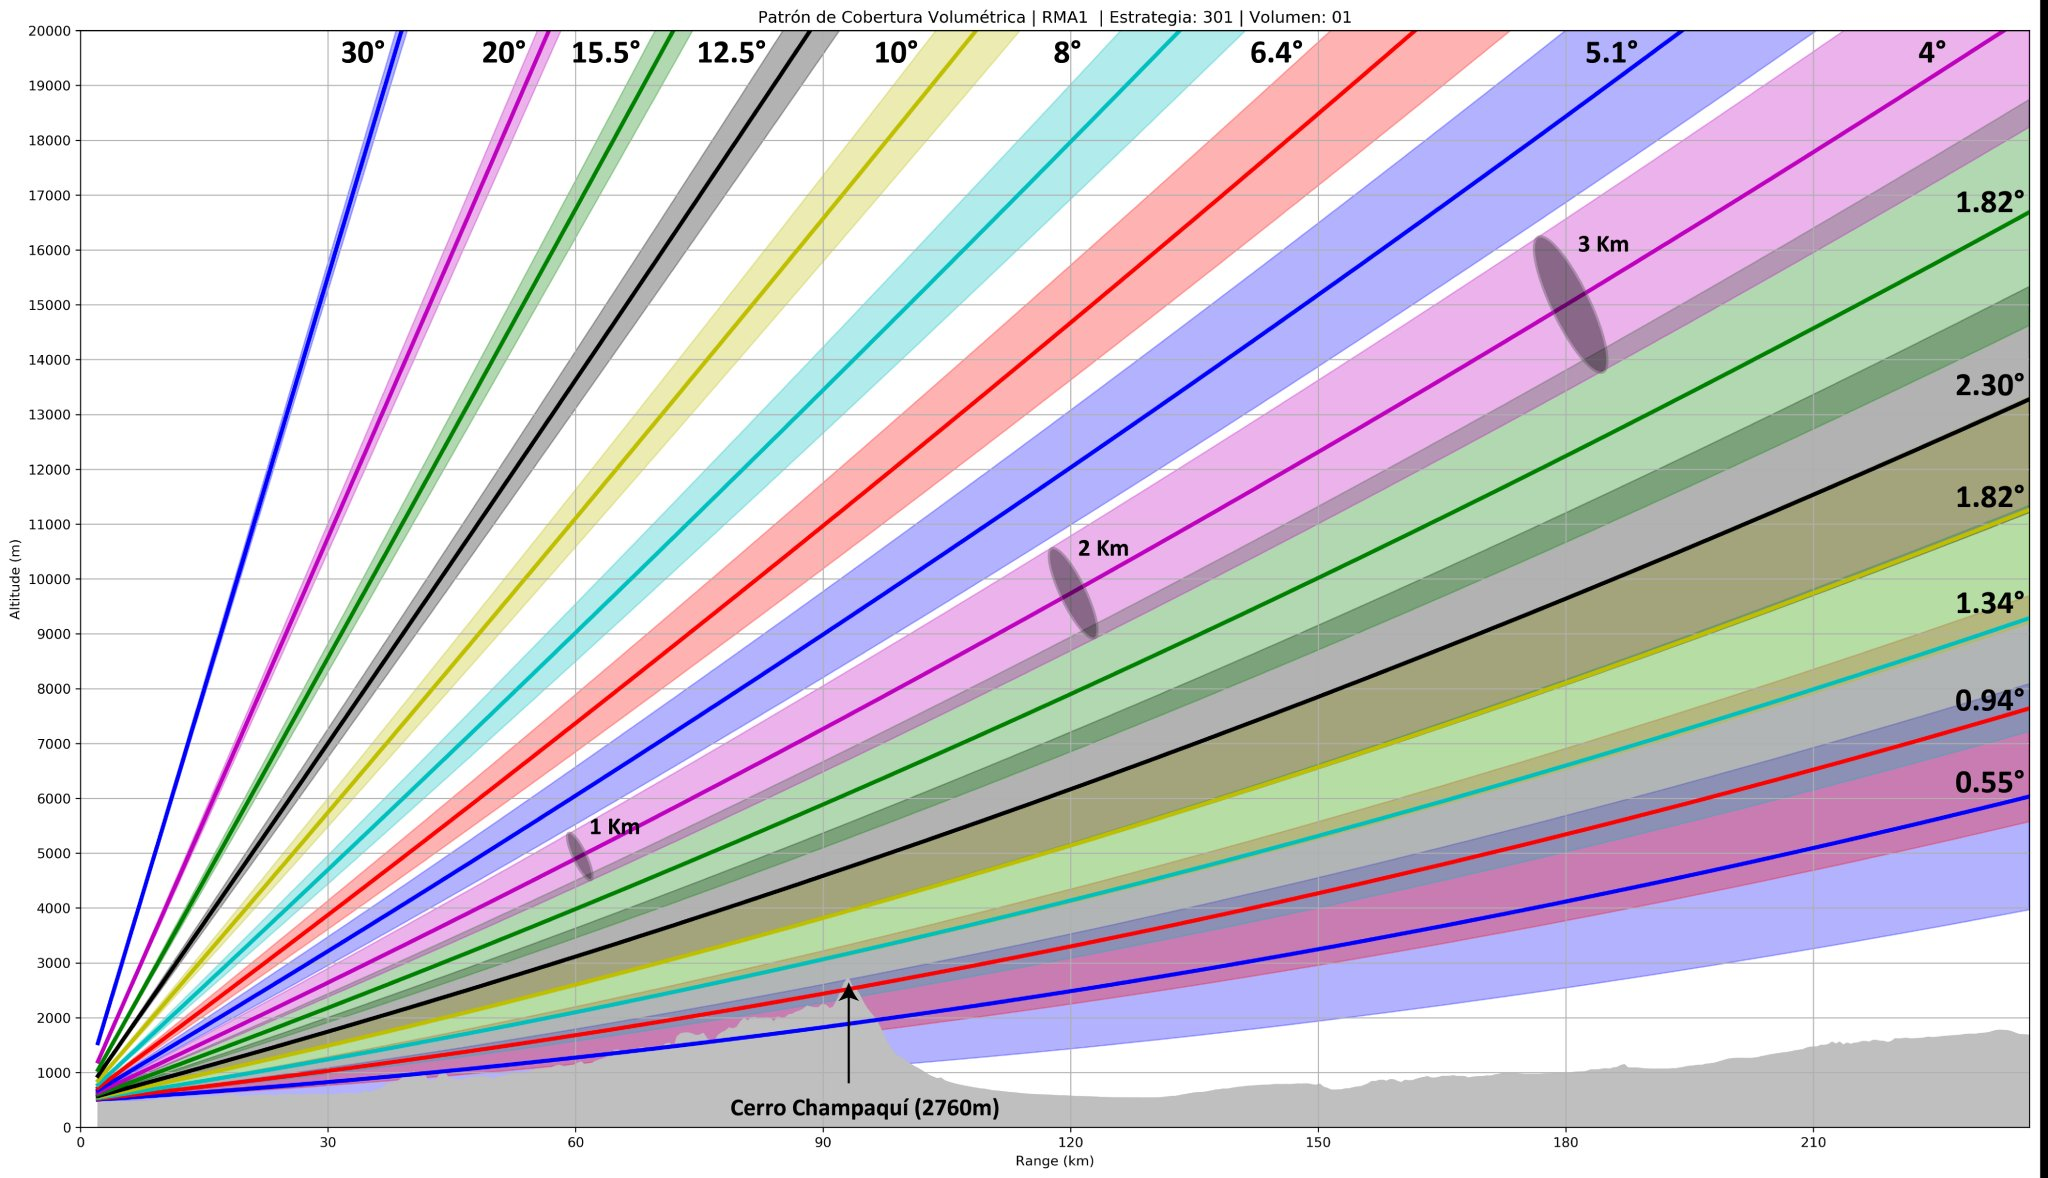

## **Realizamos un gráfico simple del factor de reflectividad DBZH**

In [ ]:
# Creamos objeto figura y le asignamos un tamaño

# Creamos un objeto display con los datos del volumen

# Definimos la proyección con la que vamos a graficar

# Grafico de DBZH


## **Graficamos un CAPPI o plano de altura constante**

In [ ]:
# Coordenadas de RMA-1
lat = -31.44133000
lon = -64.19192000
campo = 'DBZH'

grid = pyart.map.grid_from_radars(radar, grid_shape=(18, 480, 480),
                                  grid_limits=((0, 6000),(-120000, 120000), (-120000, 120000)),
                                  grid_origin = (lat, lon),
                                  fields=[campo])

#MOSTRAR MAPA CON GRID
display = pyart.graph.GridMapDisplay(grid)

fig = plt.figure(figsize=[7,6])
ax = plt.subplot(1, 1, 1, projection=projection)

nivel = 2

vmin = -30
vmax = 65

display.plot_grid(campo, vmin=vmin, vmax=vmax, level=nivel, ax=ax,
                  cmap='grc_th', title_flag=False, colorbar_flag=False)

colorbar_panel_axes = [0.175, -0.03, 0.7, 0.03]
cbax = fig.add_axes(colorbar_panel_axes)
display.plot_colorbar(cax=cbax)

plt.show()

## **Realizamos el gráfico de DBZH, ZDR, RHOHV y KDP**

In [ ]:
##########################################################################################################################
##########################################################################################################################
# Elevacion de la antena que queremos graficar
elevacion = 0
##########################################################################################################################
##########################################################################################################################

fig =
display =

projection =

# Grafico de DBZH
ax1 =
display.plot_ppi_map('DBZH', elevacion, vmin = -30, vmax = 70, cmap='grc_th', ax=ax1,
                     projection=projection)

plt.show()
# Y si agregamos un shapefile de fondo para una mejor referencia de la ubicación?

## **Graficamos un corte pseudo radial**

In [ ]:
# Se realiza grafico del radial
xsect =
# Creamos objeto seccionado
display =
# Creamos la figura
fig =
# Definimos los ejes y el campo a graficar

# Definimos los limites en x e y

## **La estimación de lluvia más común y básica se hace a través de relaciones Z-R. Este tipo de relaciones transforman el factor de reflectividad a tasa de precipitación.**


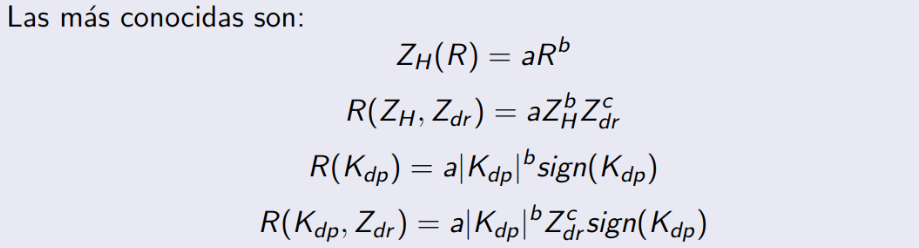

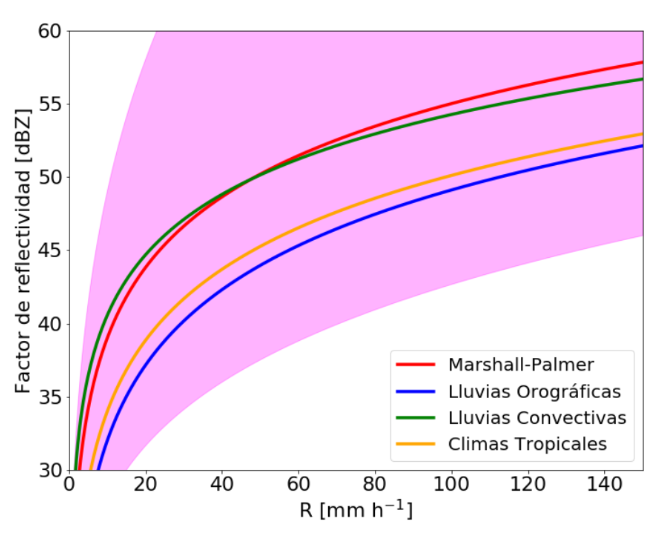

## **Calculamos un estimativo de la tasa de precipitación a partir del factor de reflectividad horizontal utilizando una relación de <font color='red'>Z-R</font> de Marshall y Palmer <font color='green'>$Z=200R^{1.6}$</font>**

### Nota: Z está en unidades lineales:
### $Z[dBZ] = log_{10}(Z[\frac{mm^{6}}{m^{3}}])$
### $Z[\frac{mm^{6}}{m^{3}}] = 10^{\frac{Z[dBZ]}{10}}$

In [ ]:
##########################################################################################################################
##########################################################################################################################

# Enmascaramos aquellos ecos no meteorologicos
filtered_field =
# Pasamos el factor de reflectividad de dBZ a unidades lineales mm**6/m**3
linear_filtered_field =
# Calculamos la precipitación a traves de nuestra relación Z-R
precip_field =
# La agregamos al volumen como un campo mas

# Le declaramos las unidades

# Creamos figura y objeto display
fig =
display =

projection =

# Grafico de DBZH
ax1 =
display.plot_ppi_map('DBZH', elevacion, vmin = -30, vmax = 70, cmap='grc_th', ax=ax1,
                     projection=projection)


# Grafico de la PRECIPITACION
ax2 =

## **Estimamos la precipitación acumulada durante el evento**

In [ ]:
##########################################################################################################################
##########################################################################################################################

# RHOHV limite a partir del cual se estima precipitacion
rho_lim = 0.9

# Elevación que queremos graficar (0 para elevacion mas baja)
elevacion = 1

##########################################################################################################################
##########################################################################################################################
# Maxima precipitación para la escala de colores
max_precip = 35

# Delta t para el cual se transforma tasa de precipitacion a precipitacion acumulada
delta_t = 10    # En minutos
projection = ccrs.Mercator() #PlateCarree

for filename in lista_de_archivos:
    try:
        # Comando de lectura
        radar = pyart.io.read(filename, include_fields=['DBZH','RHOHV'])
        # print('Procesando ',filename)

        # Filtro el campo segun un umbral en RHOHV
        filtered_field = np.ma.masked_where(radar.fields['RHOHV']['data'] < rho_lim, radar.fields['DBZH']['data'] )
        filtered_field = filtered_field.filled(fill_value=0)

        min_lon=radar.longitude['data'][0]-1.4
        max_lon=radar.longitude['data'][0]+1.4
        min_lat=radar.latitude['data'][0]-1.4
        max_lat=radar.latitude['data'][0]+1.4
    except:
        continue

    # Convierto la reflectivdad en mm**6/mm**3
    linear_filtered_field = 10**(filtered_field/10)
    # Calculo la tasa de precipitacion en mm/h
    temp_precip = (linear_filtered_field/200)**(1/1.6)
    # Calculo la precipitacion acumulada en un periodo delta t
    temp_precip = temp_precip*delta_t/60

    if filename == lista_de_archivos[0]:
        precip_field = temp_precip.copy()
    else:
        # Calculo el acumulado
        precip_field = temp_precip+precip_field

    # print(precip_field[100,25:30])
    # Agrego el nuevo campo al objeto radar
    radar.add_field_like('DBZH', 'PRECIP', precip_field, replace_existing=True)
    # Le doy las unidades correspondientes
    radar.fields['PRECIP']['units'] = 'mm'

    display = pyart.graph.RadarMapDisplay(radar)

    # Figura a crear, de proporciones pulgadas ancho x pulgadas alto, modo ajustado.
    fig = plt.figure(figsize=[11,5], tight_layout=True)

    # Grafico de DBZH
    ax1 = plt.subplot(1, 2, 1, projection=projection)
    display.plot_ppi_map('DBZH', elevacion, vmin = -30, vmax = 70, cmap='grc_th', ax=ax1,
                         projection=projection, lat_0=radar.latitude['data'][0], lon_0=radar.longitude['data'][0],
                         lat_lines=[-30,-31,-32,-33], lon_lines=[-62,-63,-64,-65,-66],
                         shapefile=path_shapes, shapefile_kwargs=shapes_kwargs,
                         min_lon=min_lon, max_lon=max_lon, min_lat=min_lat, max_lat=max_lat)
    # Se agregan circunferencias de referencia al mapa
    display.plot_range_rings([60, 120], ax=None, lw=1, ls='--')
    # Se agrega un punto para representar la ubicacion del radar en el mapa
    display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0], '*', 'RMA-1',
                       color='black', ms=15, label_offset=(0.08, 0.08))

    # Grafico de PRECIPITACION
    ax2 = fig.add_subplot(1, 2, 2, projection=projection)
    display.plot_ppi_map('PRECIP', elevacion, vmin = 0, vmax = max_precip, cmap = 'grc_rain', ax = ax2,
                         ticks=np.linspace(0,max_precip,11), resolution='10m',
                         projection = projection, lat_0 = radar.latitude['data'][0],
                         lon_0 = radar.longitude['data'][0], shapefile=path_shapes,
                         shapefile_kwargs={'zorder':1,'facecolor':'None', 'edgecolor':'grey', 'alpha':1,'lw':.5},
                         alpha = 1, colorbar_flag=True,
                         colorbar_label = 'mm', lat_lines=[-30,-31,-32,-33], lon_lines=[-62,-63,-64,-65,-66],
                         min_lon=min_lon, max_lon=max_lon, min_lat=min_lat, max_lat=max_lat)

    display.plot_range_rings([60,120], ax=None, lw=1, ls='--')
    display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0], '*', 'RMA-1',
                       color='black', ms=15, label_offset=(0.08, 0.08))

    plt.tight_layout()
    plt.show()

# *Contacto: matias.suarez@unc.edu.ar*

# 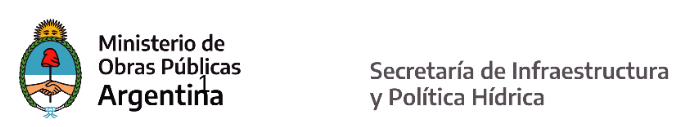

# 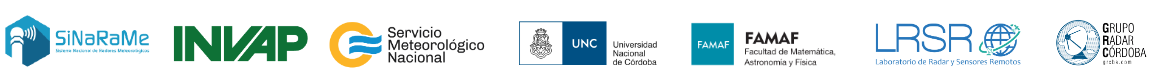